In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score, log_loss
import seaborn as sns

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
mask = train.dtypes == object

In [5]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


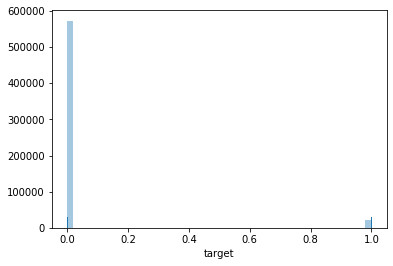

In [6]:
sns.distplot(train['target'], kde = False, rug = True)

In [19]:
# classify features
categorical_features = [col for col in test.columns if col.split('_')[-1] in ['cat', 'bin']]
dense_features = [col for col in test.columns if col not in categorical_features]
dense_features.remove('id')
print(categorical_features)
print(dense_features)

['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin']
['ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'type', 'target']


In [21]:
train['type'] = 1
test['type'] = 0
test['target'] = 0

In [45]:
# merge train and test data for pre-processing features
data = pd.concat([train, test], sort=False)

In [46]:
data.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,type
0,7,0,2,2,5,1,0,0,1,0,...,1,5,8,0,1,1,0,0,1,1
1,9,0,1,1,7,0,0,0,0,1,...,1,1,9,0,1,1,0,1,0,1
2,13,0,5,4,9,1,0,0,0,1,...,2,7,7,0,1,1,0,1,0,1
3,16,0,0,1,2,0,0,1,0,0,...,2,4,9,0,0,0,0,0,0,1
4,17,0,0,2,0,1,0,1,0,0,...,1,1,3,0,0,0,1,1,0,1


In [50]:
data.shape

(1488028, 60)

In [51]:
# # data encoding
oh_enc = OneHotEncoder(sparse = False)
data_ohe = oh_enc.fit_transform(data[categorical_features])

In [52]:
ohe_data = pd.DataFrame(data_ohe)

In [53]:
for fea in categorical_features:
    data = data.drop(fea, axis = 1)

In [58]:
# reset index in order to concate densedata and onehot data
data = data.reset_index()

In [59]:
data.head()

,index,id,target,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_reg_01,ps_reg_02,ps_reg_03,...,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,type
0,0,7,0,2,5,0,11,0.7,0.2,0.718070,...,10,1,10,1,5,9,1,5,8,1
1,1,9,0,1,7,0,3,0.8,0.4,0.766078,...,9,5,8,1,7,3,1,1,9,1
2,2,13,0,5,9,0,12,0.0,0.0,-1.000000,...,9,1,8,2,7,4,2,7,7,1
3,3,16,0,0,2,0,8,0.9,0.2,0.580948,...,7,1,8,4,2,2,2,4,9,1
4,4,17,0,0,0,0,9,0.7,0.6,0.840759,...,6,3,10,2,12,3,1,1,3,1


In [60]:
data = pd.concat([data, ohe_data], axis = 1)

In [61]:
data.shape

(1488028, 248)

In [65]:
data = data.drop(['index'], axis = 1)

In [66]:
train_data = data[data['type'] == 1]
test_data = data[data['type'] == 0]

train_data = train_data.drop(['type'], axis = 1)
test_data = test_data.drop(['type'], axis = 1)

In [67]:
train_data.shape

(595212, 246)

In [68]:
test_data.shape

(892816, 246)

In [98]:
# normalized cross entropy presented in the facebook ctr paper
# see http://dx.doi.org/10.1145/2648584.2648589
def normal_cross_entropy(label, prob, avg_prob):
    if (label.shape != prob.shape):
        raise ValueError('label shape should be qual to the prob shape, '\
                        'label shape is {0}, prob shape is {1}'.format(label, prob))
#     avg_prob = sum(prob)/len(prob) 
    value = (-1.0) / len(label) * sum(((1+label)/2 * np.log(prob) +  (1-label)/2 * np.log(1 - prob)))
    background = -1.0 * (avg_prob * np.log(avg_prob) + (1-avg_prob)* np.log(1-avg_prob))
    return value / background

In [105]:
# Helper class for train and evaluate GBDT+LR model
class GradientBoostingWithLR(object):
    def __init__(self):
        self.gbdt_model = None
        self.lr_model = None
        self.gbdt_encoder = None
        self.X_train_leafs = None
        self.X_test_leafs = None
        self.X_trains = None
#         self.is_trained = False
        
    def __gbdt_train(self, X_train, y_train):
        gbdt_model = GradientBoostingClassifier(n_estimators = 10, 
                                               max_depth = 6,
                                               verbose = 0,
                                               max_features = 0.5)
        gbdt_model.fit(X_train, y_train)
        return gbdt_model
    
    def __lr_train(self, X_train, y_train, class_weight = None):
        lr_model = LogisticRegression(class_weight = class_weight)
        lr_model.fit(X_train, y_train)
        return lr_model
    
    
    def gbdt_lr_train(self, X_train, y_train, class_weight = None):
        self.gbdt_model = self.__gbdt_train(X_train, y_train)
        
        self.X_train_leafs = self.gbdt_model.apply(X_train)[:, :, 0]
        
        self.gbdt_encoder = OneHotEncoder(categories = 'auto')
        
        self.X_trains = self.gbdt_encoder.fit_transform(self.X_train_leafs)
        
        self.lr_model = self.__lr_train(self.X_trains, y_train, class_weight = class_weight)

        return self.lr_model
    
    def gbdt_lr_pred(self, X_test, y_test, avg_prob):
        
        self.X_test_leafs = self.gbdt_model.apply(X_test)[:, :, 0]
        (train_rows, cols) = self.X_train_leafs.shape
        print("train_leafs_shape {0}".format(self.X_train_leafs.shape))
        print("test_leafs_shape {0}".format(self.X_test_leafs.shape))
        X_trains_all = self.gbdt_encoder.fit_transform(np.concatenate((self.X_train_leafs, self.X_test_leafs), axis = 0))
        
        y_pred = self.lr_model.predict_proba(X_trains_all[train_rows:])[:, 1]
        nce = normal_cross_entropy(y_test, y_pred, avg_prob)
        
        print('Normalize Cross Entropy : %.5f' % nce)
        return nce
    
    def gbdt_lr_predict(self, X_test):
        
        self.X_test_leafs = self.gbdt_model.apply(X_test)[:, :, 0]
        (train_rows, cols) = self.X_train_leafs.shape
        print("train_leafs_shape {0}".format(self.X_train_leafs.shape))
        print("test_leafs_shape {0}".format(self.X_test_leafs.shape))
        X_trains_all = self.gbdt_encoder.fit_transform(np.concatenate((self.X_train_leafs, self.X_test_leafs), axis = 0))
        
        y_pred = self.lr_model.predict(X_trains_all[train_rows:])

        return y_pred
    
    def model_assessment(self, model, X_test, y_test, avg_prob, model_name = "GBDT"):
        
        y_pred = model.predict_proba(X_test)[:, 1]
        nce = log_loss(y_test, y_pred, normalize = True)
        nce1 = normal_cross_entropy(y_test, y_pred, avg_prob)
        print("%s Normalize Cross Entropy : 1. %.5f 2. %.5f" % (model_name, nce, nce1))
        return nce

In [106]:
# evaluations
X_train, X_test, y_train, y_test = train_test_split(train_data.drop(['target'], axis = 1), train_data['target'], test_size = 0.2, random_state = 0)
avg_prob = sum(train_data['target'])/len(train_data['target'])

In [107]:
gblr = GradientBoostingWithLR()
gbdt_lr_model = gblr.gbdt_lr_train(X_train, y_train, class_weight = {0.0: 1, 1.0: 25})

C:\ProgramData\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [108]:
gblr.model_assessment(gblr.gbdt_model, X_test, y_test, avg_prob)
gblr.gbdt_lr_pred(X_test, y_test, avg_prob)

GBDT Normalize Cross Entropy : 1. 0.15283 2. 11.15457
train_leafs_shape (476169, 10)
test_leafs_shape (119043, 10)
Normalize Cross Entropy : 4.66095


4.660950166752176

In [71]:
#predict
gblr_full = GradientBoostingWithLR()
gbdt_lr_model = gblr_full.gbdt_lr_train(train_data.drop(['target'], axis = 1), train_data['target'], class_weight = {0.0: 1, 1.0: 25})
y_pred = gblr_full.gbdt_lr_predict(test_data.drop(['target'], axis = 1))
test_data['target'] = y_pred

C:\ProgramData\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


train_leafs_shape (595212, 10)
test_leafs_shape (892816, 10)


In [72]:
test_data['id'] = test_data['id'].astype(int)

In [73]:
subm = pd.DataFrame(test_data[['id','target']])
subm.to_csv('submission.csv', index = False)

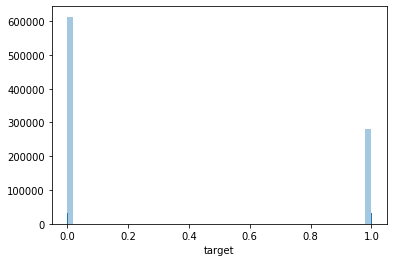

In [74]:
sns.distplot(subm['target'], kde = False, rug = True)

In [75]:
subm.target.value_counts()

0    613267
1    279549
Name: target, dtype: int64